# Autism Spectrum Disorder 

### Initalizing Dask

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import dask
import dask.dataframe as dd
from dask.distributed import Client

%matplotlib inline
import doctest


In [2]:
#close existing dask connection 
try:
    if client is not None:
        #close it
        client.close()
        print("Old Client Closed")
except:
    print("Client Undefined")

Client Undefined


In [3]:
#get new connection
client = Client(n_workers=2, threads_per_worker=2, memory_limit='6GB')
display(client)

<Client: 'tcp://127.0.0.1:60001' processes=2 threads=4, memory=11.18 GiB>

### Data Scraping
##### Can skip once data is saved to a file

In [4]:
import tweepy
import csv
import json

twitter_client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAFT4awEAAAAAmJUdmEBmOhkd59vFiR7ItoGOcLo%3DelhZheHTSeqrFKCm4rjP6nQh9V9HwgsdSaQGwV68hZchICtefN')

# # search query
# query = 'autism -is:retweet lang:en'

# # loading the tweets into a file
# # Open/create a file to append data to
# csvFile = open('result.csv', 'a')
# csvFile.truncate(0)

# #Use csv writer
# csvWriter = csv.writer(csvFile)
# csvWriter.writerow(["TweetCreatedTime", "TweetContent", "Geo", "Lang", "Metrics"])

# for tweet in tweepy.Paginator(twitter_client.search_recent_tweets, query=query,
#                               tweet_fields=['context_annotations', 'created_at', 'geo', 'lang', 'public_metrics'], 
#                               max_results=100).flatten(limit=10000):
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('ascii', 'ignore').decode('ascii'), json.dumps(tweet.geo), tweet.lang, json.dumps(tweet.public_metrics)])
# csvFile.close()

### Data Clean Up

In [52]:
# ETL 
# Make sure to decode the tweets from utf-8 to read them in properly for ETL
data = dd.read_csv("result.csv", dtype={'Geo': 'object'})
display(data.head())

TweetCreatedTime  \
0  2022-05-17 01:17:13+00:00   
1  2022-05-17 01:17:11+00:00   
2  2022-05-17 01:17:03+00:00   
3  2022-05-17 01:16:44+00:00   
4  2022-05-17 01:16:10+00:00   

                                                                                                                                                                                                                                                                                        TweetContent  \
0                                      Im happy to be my childs case manager &amp; I have built an amazing team in which my son thrives! \r\n\r\nThere is no reason they cant build of the current system!!\r\n\r\n#autism #individualfunding #choice #bcpoli @BCASDAdvocacy https://t.co/fnOsybZBYw   
1                                                                                                                                                                                                                         at least, i think it's an. i'm so bad at recognizing faces. hashtag autism   
2                                                                                    @wesyang Autism and the gender woo are highly correlated.  These supposed trans autistic kids who are immersed in this nonsense will be funneled directly into hormones and surgery, with no off ramp in sight.   
3  @NotGayGinger Really funny; Im laughing so so hard at that. To answer your frivolous statement though, no, its not just people with autism. Some of them are totally normal but just dont think critically enough to tell if what theyre looking at is legitimate or not, let alone manipulative.   
4                                                                                                                  How tf do ppl mask adhd and autism? I just caught myself rocking back and forth like a possessed child in public. Its so hard to stay still i keep trying to find a way to stim..   

   Geo Lang  \
0  NaN   en   
1  NaN   en   
2  NaN   en   
3  NaN   en   
4  NaN   en   

                                                                     Metrics  
0  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}  
1  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}  
2  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}  
3  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}  
4  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}

In [53]:
data.dtypes

TweetCreatedTime    object
TweetContent        object
Geo                 object
Lang                object
Metrics             object
dtype: object

In [54]:
data["TweetCreatedTime"] = dd.to_datetime(data.TweetCreatedTime)
display(data.head())
# data.visualize()

TweetCreatedTime  \
0 2022-05-17 01:17:13+00:00   
1 2022-05-17 01:17:11+00:00   
2 2022-05-17 01:17:03+00:00   
3 2022-05-17 01:16:44+00:00   
4 2022-05-17 01:16:10+00:00   

                                                                                                                                                                                                                                                                                        TweetContent  \
0                                      Im happy to be my childs case manager &amp; I have built an amazing team in which my son thrives! \r\n\r\nThere is no reason they cant build of the current system!!\r\n\r\n#autism #individualfunding #choice #bcpoli @BCASDAdvocacy https://t.co/fnOsybZBYw   
1                                                                                                                                                                                                                         at least, i think it's an. i'm so bad at recognizing faces. hashtag autism   
2                                                                                    @wesyang Autism and the gender woo are highly correlated.  These supposed trans autistic kids who are immersed in this nonsense will be funneled directly into hormones and surgery, with no off ramp in sight.   
3  @NotGayGinger Really funny; Im laughing so so hard at that. To answer your frivolous statement though, no, its not just people with autism. Some of them are totally normal but just dont think critically enough to tell if what theyre looking at is legitimate or not, let alone manipulative.   
4                                                                                                                  How tf do ppl mask adhd and autism? I just caught myself rocking back and forth like a possessed child in public. Its so hard to stay still i keep trying to find a way to stim..   

   Geo Lang  \
0  NaN   en   
1  NaN   en   
2  NaN   en   
3  NaN   en   
4  NaN   en   

                                                                     Metrics  
0  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}  
1  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}  
2  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}  
3  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}  
4  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}

In [55]:
# Remove the byte encoded marker from the tweets
# data["TweetContent"] = data["TweetContent"].str.strip("b\'\"")
# data["TweetContent"] = data['TweetContent'].str.decode("utf-8")
# display(data.head())
# data.visualize()


print(len(data))

10000


In [56]:
# Creating functions to clean up the tweet and tokenize each tweet
import re
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def cleanUp(text):
    '''
    Clean up each of the tweets to remove things like handles, hashtags, non alphanumeric characters.
    '''
    temp = text.lower() # Lower
    temp = re.sub("'", "", temp) # Contraction
    temp = temp.replace("\\n", " ") # Newline
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # Handles
    temp = re.sub("#[A-Za-z0-9_]+","", temp) # Hashtags
    temp = re.sub(r'http\S+', '', temp) # Links
    temp = re.sub('[()!?]', ' ', temp) # Punctuation
    temp = re.sub('\[.*?\]',' ', temp) # Punctuation
    temp = re.sub("[^a-z]"," ", temp) # Non alphanumeric
    
    # Tokenize the string and remove stop words
    stop_words = stopwords.words("english")
    stop_words.extend(["autism", "im", "autistic", "aaaaaaaaa", "aaaaaaaaaaaaaaaaaa", "zzzzzzzz"])
    
    temp = word_tokenize(temp)
    temp = list(filter(lambda x: x not in stop_words, temp))
    temp = " ".join(temp)
    
    return temp

def cleanRowWithStop(df):
    '''
    Takes in a dataframe and clean the tweetcontent row
    '''
    df["CleanedTweet"] = df["TweetContent"].map(cleanUp)
    return df


In [57]:
# Clean Tweets
# filter only tweets in english
data = data[data["Lang"] == 'en']

data = data.map_partitions(cleanRowWithStop)
display(data.head(5))
# data.visualize()

TweetCreatedTime  \
0 2022-05-17 01:17:13+00:00   
1 2022-05-17 01:17:11+00:00   
2 2022-05-17 01:17:03+00:00   
3 2022-05-17 01:16:44+00:00   
4 2022-05-17 01:16:10+00:00   

                                                                                                                                                                                                                                                                                        TweetContent  \
0                                      Im happy to be my childs case manager &amp; I have built an amazing team in which my son thrives! \r\n\r\nThere is no reason they cant build of the current system!!\r\n\r\n#autism #individualfunding #choice #bcpoli @BCASDAdvocacy https://t.co/fnOsybZBYw   
1                                                                                                                                                                                                                         at least, i think it's an. i'm so bad at recognizing faces. hashtag autism   
2                                                                                    @wesyang Autism and the gender woo are highly correlated.  These supposed trans autistic kids who are immersed in this nonsense will be funneled directly into hormones and surgery, with no off ramp in sight.   
3  @NotGayGinger Really funny; Im laughing so so hard at that. To answer your frivolous statement though, no, its not just people with autism. Some of them are totally normal but just dont think critically enough to tell if what theyre looking at is legitimate or not, let alone manipulative.   
4                                                                                                                  How tf do ppl mask adhd and autism? I just caught myself rocking back and forth like a possessed child in public. Its so hard to stay still i keep trying to find a way to stim..   

   Geo Lang  \
0  NaN   en   
1  NaN   en   
2  NaN   en   
3  NaN   en   
4  NaN   en   

                                                                     Metrics  \
0  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
1  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
2  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
3  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
4  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   

                                                                                                                                                            CleanedTweet  
0                                                                          happy childs case manager amp built amazing team son thrives reason cant build current system  
1                                                                                                                              least think bad recognizing faces hashtag  
2                                                       gender woo highly correlated supposed trans kids immersed nonsense funneled directly hormones surgery ramp sight  
3  really funny laughing hard answer frivolous statement though people totally normal dont think critically enough tell theyre looking legitimate let alone manipulative  
4                                                       tf ppl mask adhd caught rocking back forth like possessed child public hard stay still keep trying find way stim

### Vectorization

In [58]:
# Converting the data to array
dataArr = data['CleanedTweet'].to_dask_array()
dataArr.compute_chunk_sizes()
dataArr

dask.array<values, shape=(10000,), dtype=object, chunksize=(10000,), chunktype=numpy.ndarray>

In [59]:
# from dask_ml.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
    
# Dask Way
# vectorizer = HashingVectorizer()
# X = vectorizer.fit_transform(data['CleanedTweet'])
# X.compute_chunk_sizes()
# X

# Sklearn Way
vectorizer = TfidfVectorizer(use_idf=True)
pdata = dataArr.compute()
print(pdata.shape)
X = vectorizer.fit(pdata).transform(pdata)
X.shape

    

(10000,)


(10000, 15873)

In [60]:
# Checking out the TFIDF
tfidf = pd.DataFrame(X[0].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
tfidf = tfidf.sort_values('TF-IDF', ascending=False)
print (tfidf.head(10))

           TF-IDF
thrives  0.371814
built    0.313054
manager  0.308938
childs   0.301815
build    0.279952
current  0.274735
system   0.245288
team     0.244529
case     0.241634
reason   0.235215


In [61]:
# Checkout hashing vectorizer
# vectorizerH = HashingVectorizer()
# Xh = vectorizerH.fit_transform(pdata)
# Xh

In [62]:
# Checking out the TFIDF
# print(Xh.shape)
# print (Xh[0])

### Kmeans

In [17]:
from dask_ml.cluster import KMeans
import numpy as np


km = KMeans()

# Dask Way
# X.astype(np.float64, casting='safe').compute()
# km.fit_transform(X)

# Sklearn way
Xarr = np.asarray(X.todense())
km.fit_transform(Xarr)


C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


dask.array<sqrt, shape=(10000, 8), dtype=float64, chunksize=(833, 8), chunktype=numpy.ndarray>

In [18]:
from sklearn.metrics import silhouette_score as ss
from dask_ml.cluster import KMeans


inertias = []
silo = {}
di = pd.DataFrame(columns=["k","inertia","model","sil"])
di = di.set_index('k')

for r in range(2, 20):
 
    km = KMeans(n_clusters=r,random_state=1)
    km.fit(Xarr,)

    #get score
    score = ss(Xarr,km.labels_)

    silo[r] = score
    ap = {"k":[r],"inertia":[km.inertia_],"model":[km],"sil":score}
    d2 = pd.DataFrame(ap)
    d2 = d2.set_index('k')
    
    #append
    di = pd.concat([di,d2])#,ignore_index=True)
    inertias.append(km.inertia_)
    


C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
Exception in thread Profile:
Traceback (most recent call last):
  File "C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\distributed\profile.py", line 115, in process
    d = state["children"][ident]
KeyError: '_find_imported_submodules;C:\\Users\\regmi\\Desktop\\UMD\\Data605\\data605venv\\lib\\site-packages\\numba\\

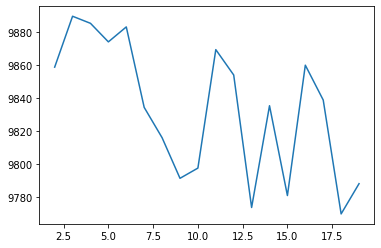

In [19]:
import matplotlib.pyplot as plt

plt.plot(di['inertia'])

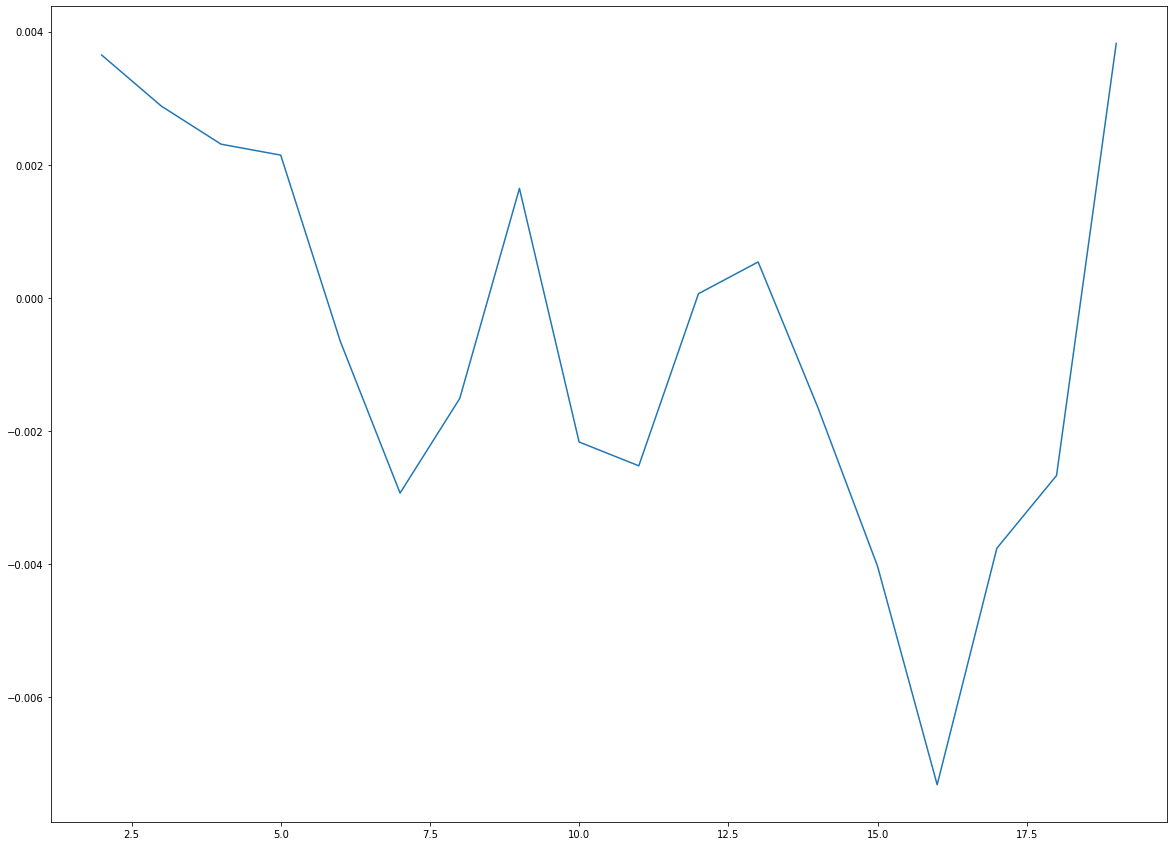

In [42]:
plt.plot(di['sil'])

In [20]:
di

inertia                                  model       sil
k                                                               
2   9858.559533   KMeans(n_clusters=2, random_state=1)  0.003648
3   9889.314348   KMeans(n_clusters=3, random_state=1)   0.00288
4   9885.038319   KMeans(n_clusters=4, random_state=1)  0.002309
5   9873.834276   KMeans(n_clusters=5, random_state=1)  0.002145
6   9882.869317   KMeans(n_clusters=6, random_state=1) -0.000656
7   9834.253506   KMeans(n_clusters=7, random_state=1) -0.002931
8   9815.939832                 KMeans(random_state=1)  -0.00151
9   9791.413633   KMeans(n_clusters=9, random_state=1)  0.001644
10  9797.588417  KMeans(n_clusters=10, random_state=1) -0.002164
11    9869.1495  KMeans(n_clusters=11, random_state=1) -0.002522
12  9853.815054  KMeans(n_clusters=12, random_state=1)  0.000063
13  9773.784732  KMeans(n_clusters=13, random_state=1)   0.00054
14  9835.263893  KMeans(n_clusters=14, random_state=1) -0.001644
15  9781.003049  KMeans(n_clusters=15, random_state=1) -0.004028
16  9859.753705  KMeans(n_clusters=16, random_state=1) -0.007312
17  9838.701016  KMeans(n_clusters=17, random_state=1)  -0.00376
18  9769.904033  KMeans(n_clusters=18, random_state=1) -0.002668
19  9788.173612  KMeans(n_clusters=19, random_state=1)  0.003822

In [63]:
# Find the most frequent words in each cluster
numCluster = 18
km = KMeans(n_clusters=numCluster, random_state=1)

# Dask Way
# X.astype(np.float64, casting='safe').compute()
# km.fit_transform(X)

# Sklearn way
km.fit_transform(Xarr)

C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


dask.array<sqrt, shape=(10000, 18), dtype=float64, chunksize=(833, 18), chunktype=numpy.ndarray>

In [64]:
from sklearn.metrics import silhouette_score as ss

score = ss(Xarr,km.labels_)
score

-0.0026675598672537743

In [65]:
km.inertia_

9769.904033208239

In [66]:
labels = dd.from_dask_array(km.labels_,columns=["label"])
labels.head()

label
0      6
1      1
2      1
3     10
4     10

In [67]:
# Combine the data 
clusterData = data.merge(labels)
clusterData.head()

TweetCreatedTime  \
0 2022-05-17 01:17:13+00:00   
1 2022-05-17 01:17:11+00:00   
2 2022-05-17 01:17:03+00:00   
3 2022-05-17 01:16:44+00:00   
4 2022-05-17 01:16:10+00:00   

                                                                                                                                                                                                                                                                                        TweetContent  \
0                                      Im happy to be my childs case manager &amp; I have built an amazing team in which my son thrives! \r\n\r\nThere is no reason they cant build of the current system!!\r\n\r\n#autism #individualfunding #choice #bcpoli @BCASDAdvocacy https://t.co/fnOsybZBYw   
1                                                                                                                                                                                                                         at least, i think it's an. i'm so bad at recognizing faces. hashtag autism   
2                                                                                    @wesyang Autism and the gender woo are highly correlated.  These supposed trans autistic kids who are immersed in this nonsense will be funneled directly into hormones and surgery, with no off ramp in sight.   
3  @NotGayGinger Really funny; Im laughing so so hard at that. To answer your frivolous statement though, no, its not just people with autism. Some of them are totally normal but just dont think critically enough to tell if what theyre looking at is legitimate or not, let alone manipulative.   
4                                                                                                                  How tf do ppl mask adhd and autism? I just caught myself rocking back and forth like a possessed child in public. Its so hard to stay still i keep trying to find a way to stim..   

   Geo Lang  \
0  NaN   en   
1  NaN   en   
2  NaN   en   
3  NaN   en   
4  NaN   en   

                                                                     Metrics  \
0  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
1  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
2  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
3  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
4  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   

                                                                                                                                                            CleanedTweet  \
0                                                                          happy childs case manager amp built amazing team son thrives reason cant build current system   
1                                                                                                                              least think bad recognizing faces hashtag   
2                                                       gender woo highly correlated supposed trans kids immersed nonsense funneled directly hormones surgery ramp sight   
3  really funny laughing hard answer frivolous statement though people totally normal dont think critically enough tell theyre looking legitimate let alone manipulative   
4                                                       tf ppl mask adhd caught rocking back forth like possessed child public hard stay still keep trying find way stim   

   label  
0      6  
1      1  
2      1  
3     10  
4     10

In [68]:
subset = clusterData[clusterData.columns[5:7]]
subset

Dask DataFrame Structure:
               CleanedTweet  label
npartitions=13                    
0                    object  int32
833                     ...    ...
...                     ...    ...
9996                    ...    ...
9999                    ...    ...
Dask Name: getitem, 125 tasks

In [69]:
# split tweet
def splitTweet(text):
    '''
    Split each of rows of tweets into a list so that they can be made into a list later
    '''
    temp = text.split()
    return temp

def splitTweets(df):
    '''
    Take in partitions and split the cleaned tweets into a list
    '''
    df["SplitTweets"] = df["CleanedTweet"].map(splitTweet)
    return df


In [70]:
# set up for bag of words
subset = subset.map_partitions(splitTweets)
subset.head()

CleanedTweet  \
0                                                                          happy childs case manager amp built amazing team son thrives reason cant build current system   
1                                                                                                                              least think bad recognizing faces hashtag   
2                                                       gender woo highly correlated supposed trans kids immersed nonsense funneled directly hormones surgery ramp sight   
3  really funny laughing hard answer frivolous statement though people totally normal dont think critically enough tell theyre looking legitimate let alone manipulative   
4                                                       tf ppl mask adhd caught rocking back forth like possessed child public hard stay still keep trying find way stim   

   label  \
0      6   
1      1   
2      1   
3     10   
4     10   

                                                                                                                                                                                    SplitTweets  
0                                                                                 [happy, childs, case, manager, amp, built, amazing, team, son, thrives, reason, cant, build, current, system]  
1                                                                                                                                              [least, think, bad, recognizing, faces, hashtag]  
2                                                              [gender, woo, highly, correlated, supposed, trans, kids, immersed, nonsense, funneled, directly, hormones, surgery, ramp, sight]  
3  [really, funny, laughing, hard, answer, frivolous, statement, though, people, totally, normal, dont, think, critically, enough, tell, theyre, looking, legitimate, let, alone, manipulative]  
4                                                         [tf, ppl, mask, adhd, caught, rocking, back, forth, like, possessed, child, public, hard, stay, still, keep, trying, find, way, stim]

In [71]:
from itertools import chain
from collections import Counter
 

wordFreqList = {}
for i in range(numCluster):
    word2dList = subset[subset.label == i].SplitTweets.to_dask_array().compute()
    wordFreqList[i] = Counter(chain.from_iterable(word2dList)).most_common(10)
    print("Cluster #{}:".format(i))
    print(wordFreqList[i])

Cluster #0:
[('fix', 1), ('us', 1), ('story', 1), ('three', 1), ('talented', 1), ('actors', 1), ('engaging', 1), ('disabilities', 1), ('zara', 1), ('charge', 1)]
Cluster #1:
[('amp', 568), ('one', 379), ('spectrum', 321), ('support', 318), ('get', 314), ('gt', 296), ('see', 276), ('help', 275), ('new', 265), ('day', 253)]
Cluster #2:
[('goes', 2), ('etc', 2), ('one', 2), ('far', 1), ('beyond', 1), ('bg', 1), ('nat', 1), ('gen', 1), ('many', 1), ('studies', 1)]
Cluster #3:
[('lol', 100), ('like', 22), ('adhd', 14), ('people', 13), ('one', 12), ('think', 10), ('something', 10), ('would', 10), ('isnt', 9), ('thats', 9)]
Cluster #4:
[('key', 5), ('show', 4), ('study', 2), ('finds', 2), ('overgrowth', 2), ('brain', 2), ('structure', 2), ('babies', 2), ('rep', 1), ('low', 1)]
Cluster #5:
[('children', 206), ('related', 37), ('disorders', 35), ('families', 28), ('parents', 26), ('needs', 22), ('spectrum', 20), ('help', 18), ('awareness', 18), ('outcomes', 17)]
Cluster #6:
[('happy', 71), ('gi

## Sentiment Analysis

### Add Sentiment Metrics to DataFrame

In [30]:
# Creating functions to clean up the tweet and tokenize each tweet
import re
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def cleanUp(text):
    '''
    Clean up each of the tweets to remove things like handles, hashtags, non alphanumeric characters.
    '''
    temp = text.lower() # Lower
    temp = re.sub("'", "", temp) # Contraction
    temp = temp.replace("\\n", " ") # Newline
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # Handles
    temp = re.sub("#[A-Za-z0-9_]+","", temp) # Hashtags
    temp = re.sub(r'http\S+', '', temp) # Links
    temp = re.sub('[()!?]', ' ', temp) # Punctuation
    temp = re.sub('\[.*?\]',' ', temp) # Punctuation
    temp = re.sub("[^a-z]"," ", temp) # Non alphanumeric
    
    # Tokenize the string and remove stop words
    temp = word_tokenize(temp)
    temp = " ".join(temp)
    
    return temp

def cleanRow(df):
    '''
    Takes in a dataframe and clean the tweetcontent row
    '''
    df["CleanedTweet"] = df["TweetContent"].map(cleanUp)
    return df

In [31]:
# Calculate values for sentiment analysis
from textblob import TextBlob


def calculateSentimentPolarity(text):
    '''
    calculate Polarity
    '''
    temp = TextBlob(text).sentiment.polarity
    return temp

def calculateSentimentSubjectivity(text):
    '''
    calculate Subjectivity
    '''
    temp = TextBlob(text).sentiment.subjectivity
    return temp

def polarityAndSubjectivity(df):
    '''
    Fill the polarity and subjectivity column
    '''
    df["Polarity"] = df["CleanedTweet"].map(calculateSentimentPolarity)
    df["Subjectivity"] = df["CleanedTweet"].map(calculateSentimentSubjectivity)
    return df


In [32]:
# Make a sentiment label
from textblob import TextBlob

6060124
def calculateSentiment(score):
    '''
    calculate sentiment
    '''
    if score < 0:
        return 0
    elif score == 0:
        return 2
    else:
        return 1



def sentimentAnalysis(df):
    '''
    Fill the sentiment column
    '''
    df["Sentiment"] = df["Polarity"].map(calculateSentiment)
    return df

In [33]:
# Set up the table for sentiment analysis

dataDec = data.map_partitions(cleanRow).map_partitions(polarityAndSubjectivity).map_partitions(sentimentAnalysis)
dataDec.head()

TweetCreatedTime  \
0 2022-05-17 01:17:13+00:00   
1 2022-05-17 01:17:11+00:00   
2 2022-05-17 01:17:03+00:00   
3 2022-05-17 01:16:44+00:00   
4 2022-05-17 01:16:10+00:00   

                                                                                                                                                                                                                                                                                        TweetContent  \
0                                      Im happy to be my childs case manager &amp; I have built an amazing team in which my son thrives! \r\n\r\nThere is no reason they cant build of the current system!!\r\n\r\n#autism #individualfunding #choice #bcpoli @BCASDAdvocacy https://t.co/fnOsybZBYw   
1                                                                                                                                                                                                                         at least, i think it's an. i'm so bad at recognizing faces. hashtag autism   
2                                                                                    @wesyang Autism and the gender woo are highly correlated.  These supposed trans autistic kids who are immersed in this nonsense will be funneled directly into hormones and surgery, with no off ramp in sight.   
3  @NotGayGinger Really funny; Im laughing so so hard at that. To answer your frivolous statement though, no, its not just people with autism. Some of them are totally normal but just dont think critically enough to tell if what theyre looking at is legitimate or not, let alone manipulative.   
4                                                                                                                  How tf do ppl mask adhd and autism? I just caught myself rocking back and forth like a possessed child in public. Its so hard to stay still i keep trying to find a way to stim..   

   Geo Lang  \
0  NaN   en   
1  NaN   en   
2  NaN   en   
3  NaN   en   
4  NaN   en   

                                                                     Metrics  \
0  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
1  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
2  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
3  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   
4  {"retweet_count": 0, "reply_count": 0, "like_count": 0, "quote_count": 0}   

                                                                                                                                                                                                                                                                   CleanedTweet  \
0                                                                                                                       im happy to be my childs case manager amp i have built an amazing team in which my son thrives there is no reason they cant build of the current system   
1                                                                                                                                                                                                         at least i think its an im so bad at recognizing faces hashtag autism   
2                                                                            autism and the gender woo are highly correlated these supposed trans autistic kids who are immersed in this nonsense will be funneled directly into hormones and surgery with no off ramp in sight   
3  really funny im laughing so so hard at that to answer your frivolous statement though no its not just people with autism some of them are totally normal but just dont think critically enough to tell if what theyre looking at is legitimate or not let alone manipulative   
4                                                                                                 ho

In [34]:
# find the count of positie and negative
print("There were {} positive and {} negative tweets.".format(len(dataDec[dataDec.Sentiment == 1]), len(dataDec[dataDec.Sentiment == 0])))

There were 4622 positive and 2403 negative tweets.


In [35]:
# Using the TFIDF for as the word vector for decision tree
DecData = dd.from_array(Xarr, columns=vectorizer.get_feature_names_out())
DecData.head()

aaaaugh  aapi  aapki  aaron  aat   ab  aba  abaautism  abab  abaers  \
0      0.0   0.0    0.0    0.0  0.0  0.0  0.0        0.0   0.0     0.0   
1      0.0   0.0    0.0    0.0  0.0  0.0  0.0        0.0   0.0     0.0   
2      0.0   0.0    0.0    0.0  0.0  0.0  0.0        0.0   0.0     0.0   
3      0.0   0.0    0.0    0.0  0.0  0.0  0.0        0.0   0.0     0.0   
4      0.0   0.0    0.0    0.0  0.0  0.0  0.0        0.0   0.0     0.0   

   abandoned  abandoning  abandonment  abatement  abbey  abc  abcs  abducted  \
0        0.0         0.0          0.0        0.0    0.0  0.0   0.0       0.0   
1        0.0         0.0          0.0        0.0    0.0  0.0   0.0       0.0   
2        0.0         0.0          0.0        0.0    0.0  0.0   0.0       0.0   
3        0.0         0.0          0.0        0.0    0.0  0.0   0.0       0.0   
4        0.0         0.0          0.0        0.0    0.0  0.0   0.0       0.0   

   abduction  abelism  abelist  aberdeen  abilest  abilities  ability  abis  \
0        0.0      0.0      0.0       0.0      0.0        0.0      0.0   0.0   
1        0.0      0.0      0.0       0.0      0.0        0.0      0.0   0.0   
2        0.0      0.0      0.0       0.0      0.0        0.0      0.0   0.0   
3        0.0      0.0      0.0       0.0      0.0        0.0      0.0   0.0   
4        0.0      0.0      0.0       0.0      0.0        0.0      0.0   0.0   

   able  abled  ableds  ableism  ableist  ableists  ablest  abliest  abnormal  \
0   0.0    0.0     0.0      0.0      0.0       0.0     0.0      0.0       0.0   
1   0.0    0.0     0.0      0.0      0.0       0.0     0.0      0.0       0.0   
2   0.0    0.0     0.0      0.0      0.0       0.0     0.0      0.0       0.0   
3   0.0    0.0     0.0      0.0      0.0       0.0     0.0      0.0       0.0   
4   0.0    0.0     0.0      0.0      0.0       0.0     0.0      0.0       0.0   

   abnormalities  abnormality  abnormally  abolish  abolishing  abort  \
0            0.0          0.0         0.0      0.0         0.0    0.0   
1            0.0          0.0         0.0      0.0         0.0    0.0   
2            0.0          0.0         0.0      0.0         0.0    0.0   
3            0.0          0.0         0.0      0.0         0.0    0.0   
4            0.0          0.0         0.0      0.0         0.0    0.0   

   aborted  abortion  aboutautism  abramovich  abridge  abroad  abse  absence  \
0      0.0       0.0          0.0         0.0      0.0     0.0   0.0      0.0   
1      0.0       0.0          0.0         0.0      0.0     0.0   0.0      0.0   
2      0.0       0.0          0.0         0.0      0.0     0.0   0.0      0.0   
3      0.0       0.0          0.0         0.0      0.0     0.0   0.0      0.0   
4      0.0       0.0          0.0         0.0      0.0     0.0   0.0      0.0   

   absent  absolute  absolutely  absorbing  absorption  abstract  abt  abu  \
0     0.0       0.0         0.0        0.0         0.0       0.0  0.0  0.0   
1     0.0       0.0         0.0        0.0         0.0       0.0  0.0  0.0   
2     0.0       0.0         0.0        0.0         0.0       0.0  0.0  0.0   
3     0.0       0.0         0.0        0.0         0.0       0.0  0.0  0.0   
4     0.0       0.0         0.0        0.0         0.0       0.0  0.0  0.0   

   abundance  abuse  abused  abuser  abuses  abusing  abusive  abysmal   ac  \
0        0.0    0.0     0.0     0.0     0.0      0.0      0.0      0.0  0.0   
1        0.0    0.0     0.0     0.0     0.0      0.0      0.0      0.0  0.0   
2        0.0    0.0     0.0     0.0     0.0      0.0      0.0      0.0  0.0   
3        0.0    0.0     0.0     0.0     0.0      0.0      0.0      0.0  0.0   
4        0.0    0.0     0.0     0.0     0.0      0.0      0.0      0.0  0.0   

   aca  acacia  academia  academic  academically  academics  academy  acc  \
0  0.0     0.0       0.0       0.0           0.0        0.0      0.0  0.0   
1  0.0     0.0       0.0       0.0           0.0        0.0      0.0  0.0   
2  0.0     0.0

In [36]:
# Merge the sentiment and subjectivity column into the decdata dataframe
sentSubset = dataDec[dataDec.columns[7:9]]
sentSubset

Dask DataFrame Structure:
              Subjectivity Sentiment
npartitions=1                       
                   float64     int64
                       ...       ...
Dask Name: getitem, 12 tasks

In [37]:
# Merge the vetorized data and sentiment data
decX = DecData.merge(sentSubset)
decX

Dask DataFrame Structure:
               aaaaugh     aapi    aapki    aaron      aat       ab      aba abaautism     abab   abaers abandoned abandoning abandonment abatement    abbey      abc     abcs abducted abduction  abelism  abelist aberdeen  abilest abilities  ability     abis     able    abled   ableds  ableism  ableist ableists   ablest  abliest abnormal abnormalities abnormality abnormally  abolish abolishing    abort  aborted abortion aboutautism abramovich  abridge   abroad     abse  absence   absent absolute absolutely absorbing absorption abstract      abt      abu abundance    abuse   abused   abuser   abuses  abusing  abusive  abysmal       ac      aca   acacia academia academic academically academics  academy      acc acccepting   accent  accents   accept acceptable acceptance accepted accepting  accepts    acces   access accessibility accessible accessing accessories accessory accident accidentally accidents accommodate accommodated accommodates accommodating accommodation accommodations accomodating accomodations accompanying accomplish accomplished accomplishes accomplishment according  account accountability accountable accountant accounting accounts    accra accredited     accs     acct accumulated accuracy accurate accurately accusation   accuse  accused  accuses accusing      acd      ace   acearo  acerbic acetaminophen acetominaphen     ache    aches achievable  achieve achieved achievement achieving achilles acknowledge acknowledged acknowledgement acknowledges acknowledging  acmeiku     acnh   acorns acquaintances  acquire acquired acrobatic  acronym   across acrually      act    acted    actin   acting actinobacteria   action  actions activate activated activating activation   active actively activism activist activists activities activity    actor   actors  actress     acts   actual actualisation actually actuallyautistic actuslly   acuity aculaser    acute       ad      ada     adam   adamou  adamson    adapt  adapted adapting adaptive      add    added adderall adderrall   addict addicted addiction addictions  addicts   adding  addison addition additional additionally additude   addons  address addressed addresses addressing     adds     addy    addys adeficit  adeptus adequate adequately  aderall     adhc     adhd   adhder  adhders   adhere     adhs adjacent adjectives   adjust adjusted adjustment adjustments adjuvants   adland     adls    admin administered administrate administration administrator administrators admirable admiration admission admissions    admit   admits admitted admittedly admitting adolescence adolescents    adopt  adopted adorable    adore   adores     ados adrenalin   adrian      ads    adult adulthood   adults  advance advanced advancement advances advantage advantageous adventure adventures  adverse adversely advertised advertisement advertiser advertising   advice   advise  advised advisory advocacy advocate advocated advocates advocating   advuce       ae aegoaegyos aerospace    aesop aesthetic      aet       af     afab    afaik     afar   affair   affect affected affecting affection  affects    affer affidavit affiliated affiliations   affirm affirmation affirmative affirming  afflict afflicted afflicting affliction   afford affordability affordable afforded aforementioned   afraid   africa  african     afro afrocentric afrolatina      aft afterall aftercare aftermaths afternoon afternoons afterthought     aftg      afu      age     aged agencies   agency   agenda    agent   agents     ages aggorant aggregates aggression aggressive aggressively    aging agitated      ago    agony agoraphobia      agp  agrawal    agree agreeableness   agreed agreeing   agrees agricultural       ah      aha     ahah    ahava    ahead     ahfg      ahh   ahhhhh  ahlberg       ai      aid    aidan     aide     aids    aight ailments      aim    aimed   aiming     aims     aint      air aircraft    aired    aires   airing airmatress  airport  airtime    aitsf ajfgshdjfishbsf  ajotehr ajust

In [38]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()
parameters = {'max_depth':np.arange(1, 10)}
g = GridSearchCV(clf,parameters,refit=True,cv=2)
x = decX.loc[:, decX.columns != "Sentiment"].compute()
y = decX.loc[:, decX.columns == "Sentiment"].compute()
g.fit(x,y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [39]:
df = pd.DataFrame(g.cv_results_)
df.sort_values(by=["mean_test_score"],ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8       5.948506      0.615164         0.748939        0.018866   
7       4.790191      0.111701         0.680301        0.024060   
6       4.548757      0.184625         0.593872        0.044380   
5       4.244063      0.118271         0.655842        0.090392   
4       3.947443      0.186491         0.730530        0.199995   
3       3.609733      0.052235         0.725132        0.028157   
2       3.097238      0.123157         0.670455        0.011688   
1       2.810466      0.043774         0.752966        0.017970   
0       1.974293      0.013393         0.647240        0.112689   

  param_max_depth            params  split0_test_score  split1_test_score  \
8               9  {'max_depth': 9}             0.7396             0.7562   
7               8  {'max_depth': 8}             0.7336             0.7540   
6               7  {'max_depth': 7}             0.7300             0.7476   
5               6  {'max_depth': 6}             0.7216             0.7428   
4               5  {'max_depth': 5}             0.7200             0.7370   
3               4  {'max_depth': 4}             0.7092             0.7290   
2               3  {'max_depth': 3}             0.7138             0.7142   
1               2  {'max_depth': 2}             0.7138             0.7088   
0               1  {'max_depth': 1}             0.7060             0.7084   

   mean_test_score  std_test_score  rank_test_score  
8           0.7479          0.0083                1  
7           0.7438          0.0102                2  
6           0.7388          0.0088                3  
5           0.7322          0.0106                4  
4           0.7285          0.0085                5  
3           0.7191          0.0099                6  
2           0.7140          0.0002                7  
1           0.7113          0.0025                8  
0           0.7072          0.0012                9

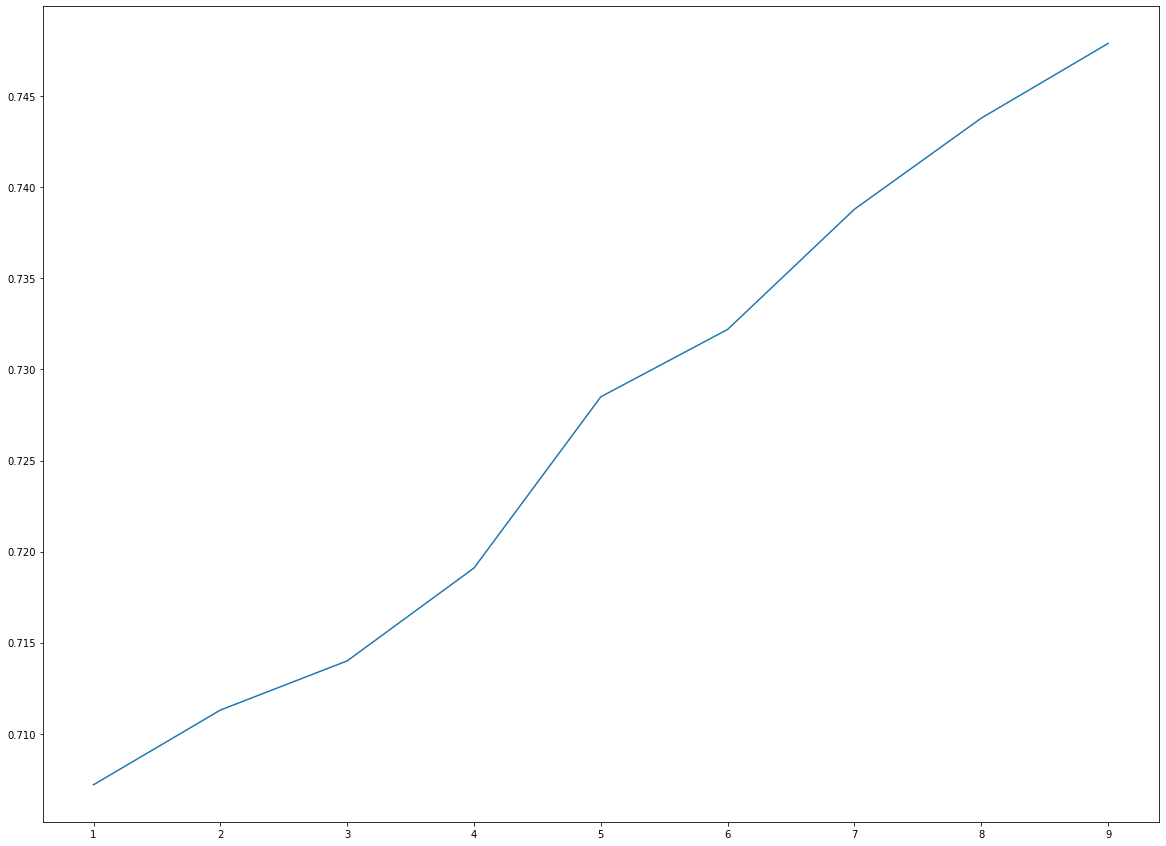

In [40]:
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(df.param_max_depth,df.mean_test_score)

[Text(0.3468952922077922, 0.95, 'zucker <= 0.013\ngini = 0.64\nsamples = 100.0%\nvalue = [0.24, 0.462, 0.298]\nclass = Positive'),
 Text(0.11688311688311688, 0.85, 'kill <= 0.103\ngini = 0.01\nsamples = 24.6%\nvalue = [0.004, 0.001, 0.995]\nclass = Neutral'),
 Text(0.1038961038961039, 0.75, 'transsexual <= 0.245\ngini = 0.008\nsamples = 24.6%\nvalue = [0.003, 0.001, 0.996]\nclass = Neutral'),
 Text(0.09090909090909091, 0.65, 'thread <= 0.256\ngini = 0.006\nsamples = 24.6%\nvalue = [0.002, 0.001, 0.997]\nclass = Neutral'),
 Text(0.07792207792207792, 0.55, 'succeed <= 0.5\ngini = 0.006\nsamples = 24.6%\nvalue = [0.002, 0.001, 0.997]\nclass = Neutral'),
 Text(0.06493506493506493, 0.45, 'offerings <= 0.231\ngini = 0.005\nsamples = 24.6%\nvalue = [0.002, 0.0, 0.998]\nclass = Neutral'),
 Text(0.05194805194805195, 0.35, 'know <= 0.165\ngini = 0.004\nsamples = 24.6%\nvalue = [0.002, 0.0, 0.998]\nclass = Neutral'),
 Text(0.03896103896103896, 0.25, 'vacs <= 0.146\ngini = 0.003\nsamples = 24.6%\n

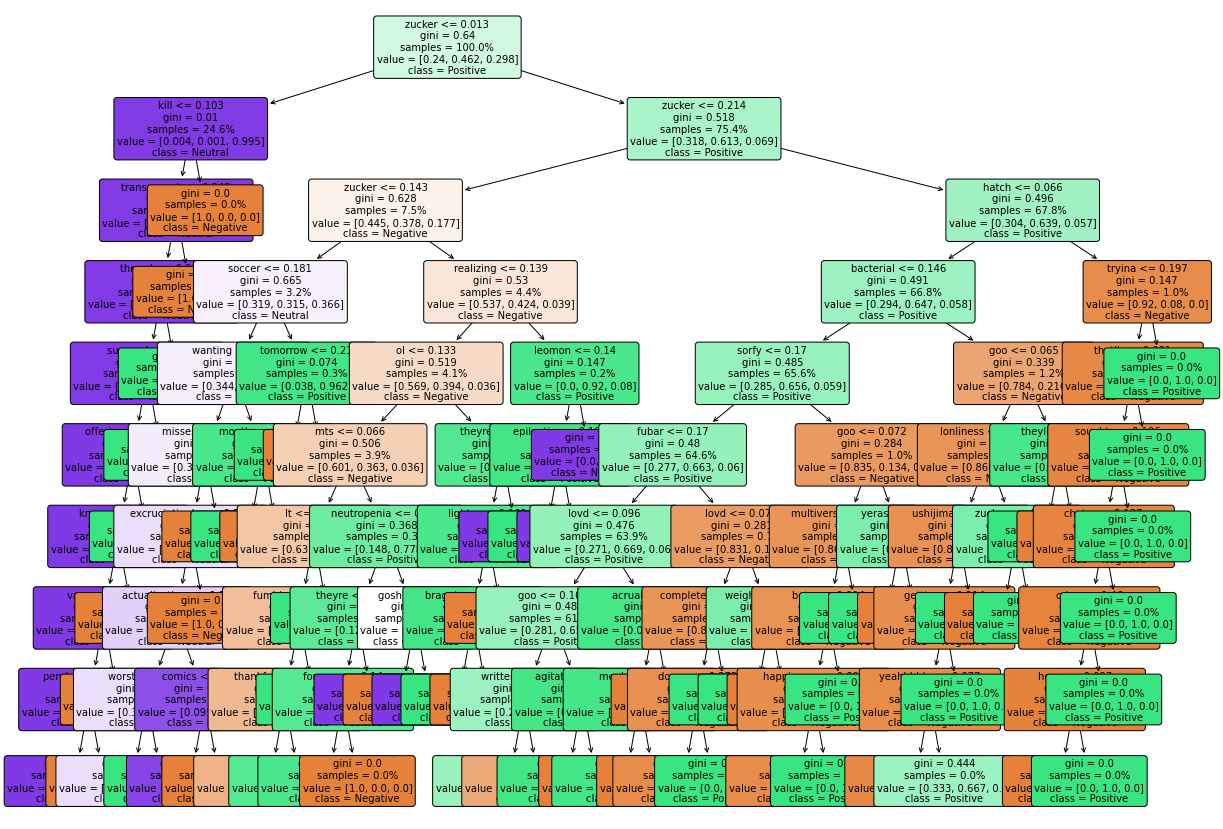

In [41]:
tree.plot_tree(g.best_estimator_,filled=True,feature_names=sorted(x.columns),class_names=['Negative', 'Positive', 'Neutral'],fontsize=10,rounded=True,proportion=True)